<a href="https://colab.research.google.com/github/Safana14/netflix-data-analysis/blob/main/Personalized_Healthcare_Recommendations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import warnings
import time
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
import tkinter as tk
from tkinter import filedialog, messagebox
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score , recall_score , f1_score ,classification_report ,confusion_matrix
from sklearn.decomposition import PCA

# **Loading dataset**

In [ ]:
file_path = file_path = '/content/blood.csv'
data = pd.read_csv(file_path)

data.head()

,Recency,Frequency,Monetary,Time,Class
0,2,50,12500,99,1
1,0,13,3250,28,1
2,1,17,4000,36,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Data Exploration and Preprocessing**

In [ ]:
data.describe()

,Recency,Frequency,Monetary,Time,Class
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.516043,1378.676471,34.284759,0.237968
std,8.095396,5.841825,1459.826781,24.380307,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,99.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Recency    748 non-null    int64
 1   Frequency  748 non-null    int64
 2   Monetary   748 non-null    int64
 3   Time       748 non-null    int64
 4   Class      748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [ ]:
data.isnull().values.any()

np.False_

In [ ]:
missing_values = data.isnull().sum()

missing_values

,0
Recency,0
Frequency,0
Monetary,0
Time,0
Class,0


In [ ]:
data['Class'].value_counts()

,count
Class,
0,570
1,178


In [ ]:
print(data.columns)

Index(['Recency', 'Frequency', 'Monetary', 'Time', 'Class'], dtype='object')


# **Statistical Analysis**

In [ ]:
numerical_columns =  ['Recency', 'Frequency', 'Monetary', 'Time', 'Class']
mean_values = data[numerical_columns].mean()
print("Mean values of numerical columns:")
print(mean_values)

Mean values of numerical columns:
Recency         9.506684
Frequency       5.516043
Monetary     1378.676471
Time           34.284759
Class           0.237968
dtype: float64


In [ ]:
std_values = data[numerical_columns].std()
print("\nStandard deviation of numerical columns:")
print(std_values)


Standard deviation of numerical columns:
Recency         8.095396
Frequency       5.841825
Monetary     1459.826781
Time           24.380307
Class           0.426124
dtype: float64


In [ ]:
median_values = data[numerical_columns].median()
print("\nMedian values of numerical columns:")
print(median_values)


Median values of numerical columns:
Recency         7.0
Frequency       4.0
Monetary     1000.0
Time           28.0
Class           0.0
dtype: float64


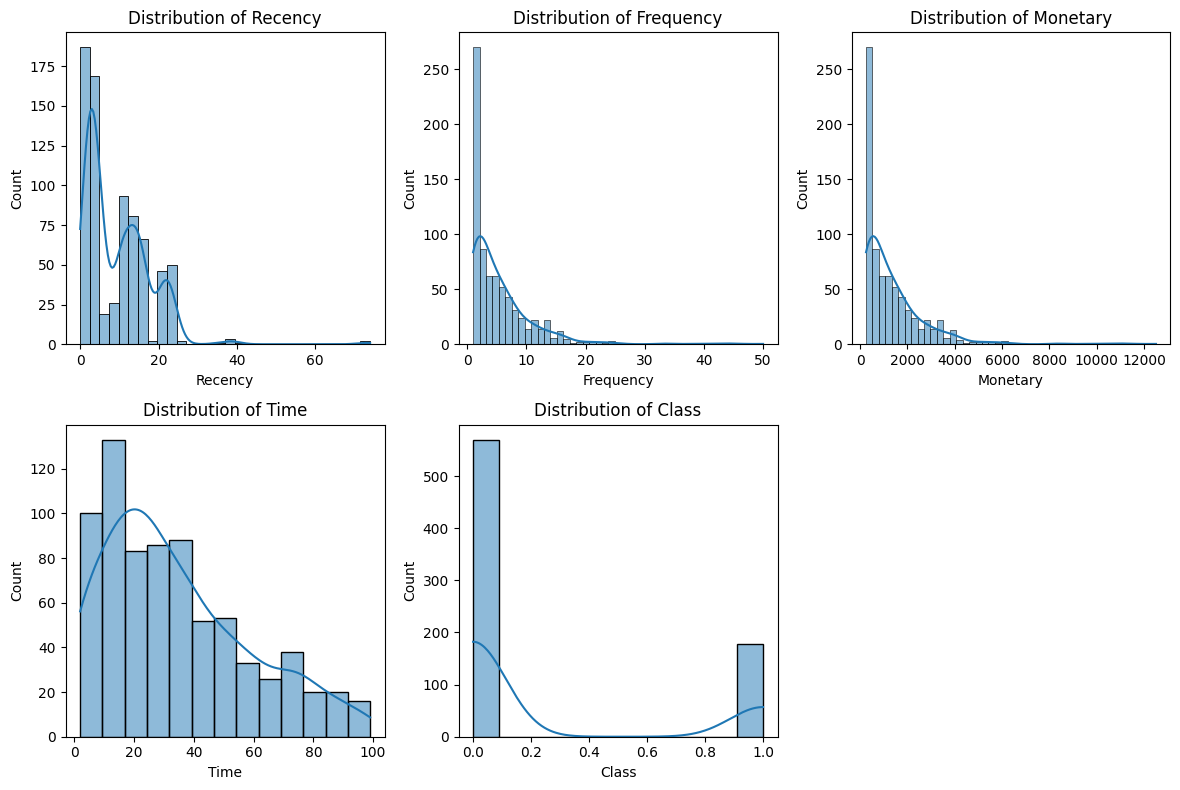

In [ ]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# **Encoding Categorical Variables**

In [ ]:
categorical_cols = data.select_dtypes(include='object').columns
print("Categorical Columns:", categorical_cols.tolist())

Categorical Columns: []


In [ ]:
encoded_data = data.copy()

# Apply LabelEncoder to each categorical column
le_dict = {}
for col in categorical_cols:
    le = LabelEncoder()
    encoded_data[col] = le.fit_transform(encoded_data[col])
    le_dict[col] = le


In [ ]:
print(encoded_data.head())

   Recency  Frequency  Monetary  Time  Class
0        2         50     12500    99      1
1        0         13      3250    28      1
2        1         17      4000    36      1
3        2         20      5000    45      1
4        1         24      6000    77      0


# **Normalizing Numerical Columns**

In [ ]:
scaler = MinMaxScaler()

numerical_columns = ['Recency', 'Frequency', 'Monetary', 'Time', 'Class']

data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

data.head()

,Recency,Frequency,Monetary,Time,Class
0,0.027027,1.000000,1.000000,1.000000,1.0
1,0.000000,0.244898,0.244898,0.268041,1.0
2,0.013514,0.326531,0.306122,0.350515,1.0
3,0.027027,0.387755,0.387755,0.443299,1.0
4,0.013514,0.469388,0.469388,0.773196,0.0


# **Correlation Matrix Analysis**

In [ ]:
correlation_matrix = data.corr()
correlation_matrix

,Recency,Frequency,Monetary,Time,Class
Recency,1.000000,-0.182908,-0.182745,0.160486,-0.279869
Frequency,-0.182908,1.000000,0.999980,0.635106,0.218949
Monetary,-0.182745,0.999980,1.000000,0.635364,0.218633
Time,0.160486,0.635106,0.635364,1.000000,-0.035653
Class,-0.279869,0.218949,0.218633,-0.035653,1.000000


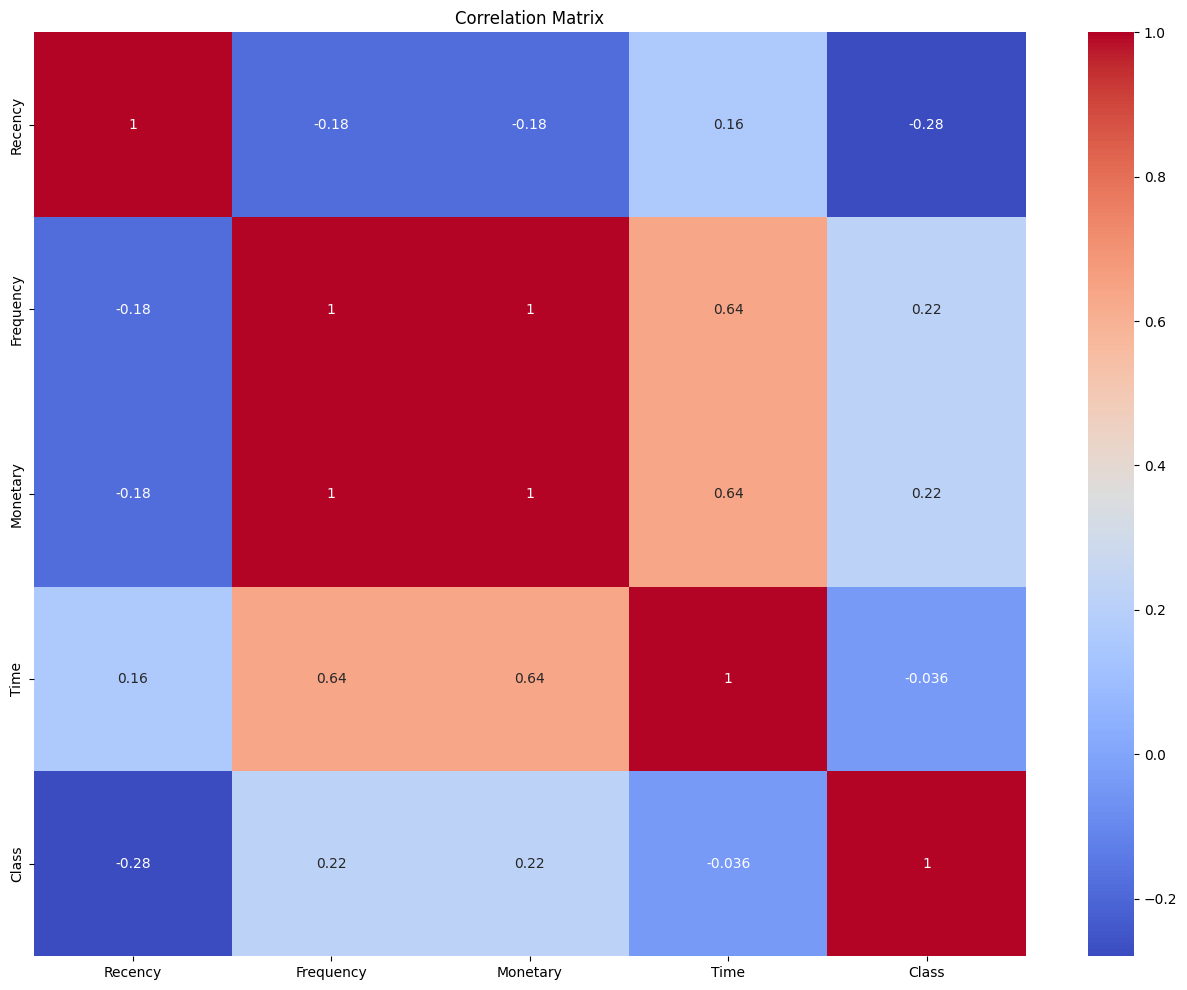

In [ ]:
plt.figure(figsize=(16, 12))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# **Train Test and Split**

In [ ]:
X=data.drop('Class', axis=1)
y=data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((598, 4), (150, 4), (598,), (150,))

# **Feature Scaling for Modelling**

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

(X_train_scaled.shape, X_test_scaled.shape)
print("Scaled training data shape:", X_train_scaled.shape)
print("Scaled testing data shape:", X_test_scaled.shape)

Scaled training data shape: (598, 4)
Scaled testing data shape: (150, 4)


# **Decision Tree Classifier**

 Decision Tree Classifier Accuracy: 0.6467
 Training Time: 0.0036 seconds
 Prediction Time: 0.0004 seconds
 Total Execution Time: 0.0040 seconds


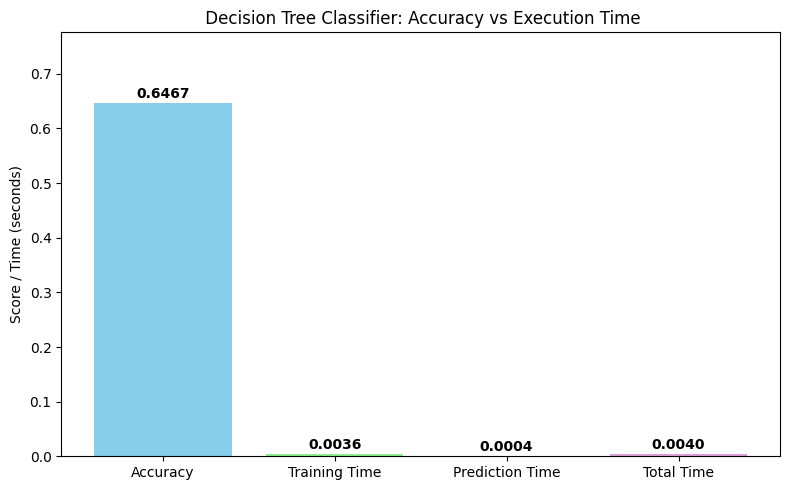

In [ ]:
# Initialize the model
decision_tree_classifier = DecisionTreeClassifier(random_state=42)

# Measure training time
start_train = time.time()
decision_tree_classifier.fit(X_train_scaled, y_train)
end_train = time.time()

# Measure prediction time
start_predict = time.time()
decision_tree_y_pred = decision_tree_classifier.predict(X_test_scaled)
end_predict = time.time()

# Calculate accuracy
decision_tree_accuracy = accuracy_score(y_test, decision_tree_y_pred)

# Calculate times
train_time = end_train - start_train
predict_time = end_predict - start_predict
total_time = train_time + predict_time

# Output results
print(f" Decision Tree Classifier Accuracy: {decision_tree_accuracy:.4f}")
print(f" Training Time: {train_time:.4f} seconds")
print(f" Prediction Time: {predict_time:.4f} seconds")
print(f" Total Execution Time: {total_time:.4f} seconds")

# Visualization
metrics = ['Accuracy', 'Training Time', 'Prediction Time', 'Total Time']
values = [decision_tree_accuracy, train_time, predict_time, total_time]
colors = ['skyblue', 'lightgreen', 'salmon', 'plum']

plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=colors)
plt.title(" Decision Tree Classifier: Accuracy vs Execution Time")
plt.ylabel("Score / Time (seconds)")
plt.ylim(0, max(values) * 1.2)

# Add text labels
for i, v in enumerate(values):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# **Random Forest Classifier**

Random Forest Classifier Accuracy: 0.7267
Training Time: 0.3069 seconds
Prediction Time: 0.0121 seconds
Total Execution Time: 0.3190 seconds


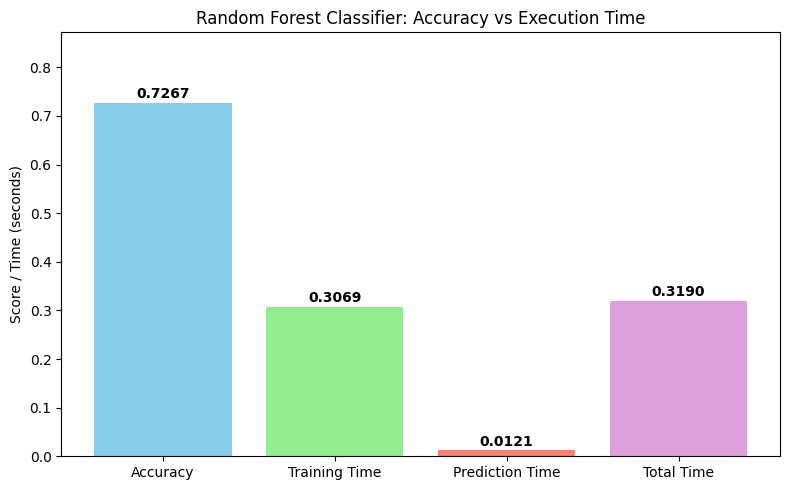

In [ ]:
randomforest_classifier = RandomForestClassifier(random_state=42)

# Measure training time
start_train = time.time()
randomforest_classifier.fit(X_train_scaled, y_train)
end_train = time.time()

# Measure prediction time
start_predict = time.time()
randomforest_classifier_y_pred = randomforest_classifier.predict(X_test_scaled)
end_predict = time.time()

# Calculate accuracy
randomforest_classifier_accuracy = accuracy_score(y_test, randomforest_classifier_y_pred)

# Calculate times
train_time = end_train - start_train
predict_time = end_predict - start_predict
total_time = train_time + predict_time

# Output results
print(f"Random Forest Classifier Accuracy: {randomforest_classifier_accuracy:.4f}")
print(f"Training Time: {train_time:.4f} seconds")
print(f"Prediction Time: {predict_time:.4f} seconds")
print(f"Total Execution Time: {total_time:.4f} seconds")

# Visualization
metrics = ['Accuracy', 'Training Time', 'Prediction Time', 'Total Time']
values = [randomforest_classifier_accuracy, train_time, predict_time, total_time]
colors = ['skyblue', 'lightgreen', 'salmon', 'plum']

plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=colors)
plt.title("Random Forest Classifier: Accuracy vs Execution Time")
plt.ylabel("Score / Time (seconds)")
plt.ylim(0, max(values) * 1.2)

# Add text labels
for i, v in enumerate(values):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# **Support Vector Machine (SVM)**

SVM Accuracy: 0.7533
Training Time: 0.1078 seconds
Prediction Time: 0.0095 seconds
Total Execution Time: 0.1173 seconds


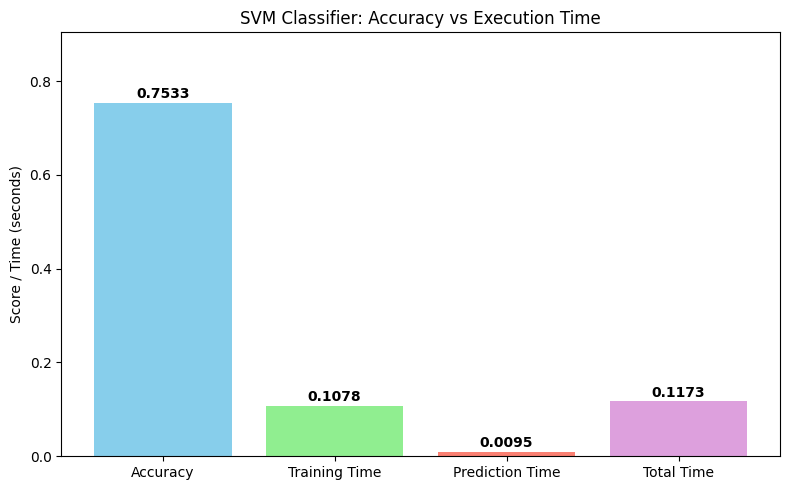

In [ ]:
svm_model = SVC(probability=True, random_state=42)

# Measure training time
start_train = time.time()
svm_model.fit(X_train_scaled, y_train)
end_train = time.time()

# Measure prediction time
start_predict = time.time()
svm_y_pred = svm_model.predict(X_test_scaled)
end_predict = time.time()

# Calculate accuracy
svm_accuracy = accuracy_score(y_test, svm_y_pred)

# Calculate times
train_time = end_train - start_train
predict_time = end_predict - start_predict
total_time = train_time + predict_time

# Output results
print(f"SVM Accuracy: {svm_accuracy:.4f}")
print(f"Training Time: {train_time:.4f} seconds")
print(f"Prediction Time: {predict_time:.4f} seconds")
print(f"Total Execution Time: {total_time:.4f} seconds")

# Visualization
metrics = ['Accuracy', 'Training Time', 'Prediction Time', 'Total Time']
values = [svm_accuracy, train_time, predict_time, total_time]
colors = ['skyblue', 'lightgreen', 'salmon', 'plum']

plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=colors)
plt.title("SVM Classifier: Accuracy vs Execution Time")
plt.ylabel("Score / Time (seconds)")
plt.ylim(0, max(values) * 1.2)

# Add value labels
for i, v in enumerate(values):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


# **XG Boost Classifier**

XGBoost Accuracy: 0.7533
Training Time: 0.0147 seconds
Prediction Time: 0.0012 seconds
Total Execution Time: 0.0159 seconds


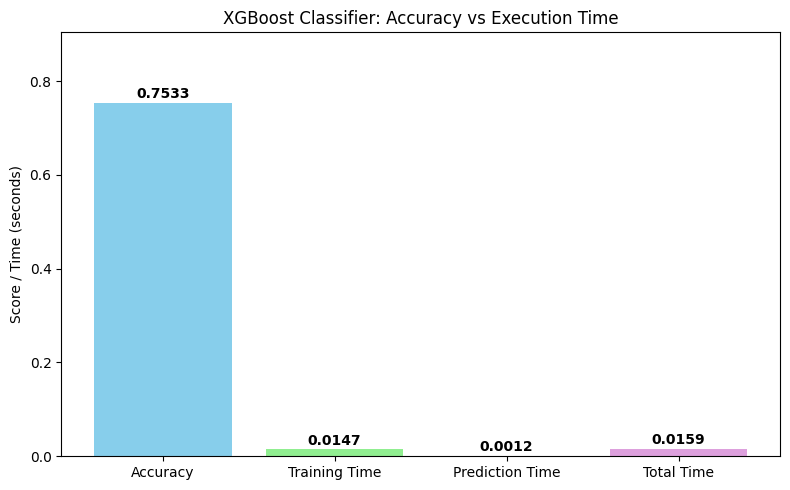

In [ ]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, n_estimators=10)

# Measure training time
start_train = time.time()
xgb_model.fit(X_train_scaled, y_train)
end_train = time.time()

# Measure prediction time
start_predict = time.time()
xgb_y_pred = xgb_model.predict(X_test_scaled)
end_predict = time.time()

# Calculate accuracy
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)

# Execution time
train_time = end_train - start_train
predict_time = end_predict - start_predict
total_time = train_time + predict_time

# Print results
print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")
print(f"Training Time: {train_time:.4f} seconds")
print(f"Prediction Time: {predict_time:.4f} seconds")
print(f"Total Execution Time: {total_time:.4f} seconds")

# Visualization
metrics = ['Accuracy', 'Training Time', 'Prediction Time', 'Total Time']
values = [xgb_accuracy, train_time, predict_time, total_time]
colors = ['skyblue', 'lightgreen', 'salmon', 'plum']

plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=colors)
plt.title("XGBoost Classifier: Accuracy vs Execution Time")
plt.ylabel("Score / Time (seconds)")
plt.ylim(0, max(values) * 1.2)

# Add value labels
for i, v in enumerate(values):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# **Logistic Regression**

 Logistic Regression Accuracy: 0.7600
 Training Time: 0.0190 seconds
 Prediction Time: 0.0005 seconds
 Total Execution Time: 0.0195 seconds


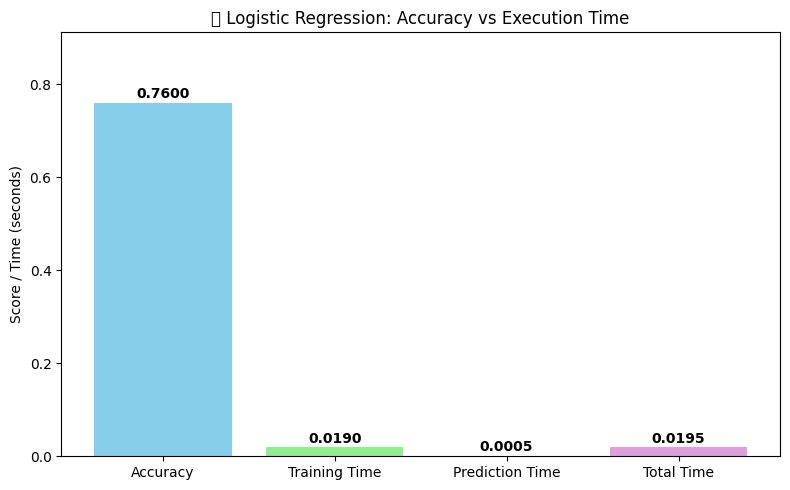

In [ ]:
# Initialize the model
logistic_model = LogisticRegression(random_state=42)

# Measure training time
start_train = time.time()
logistic_model.fit(X_train_scaled, y_train)
end_train = time.time()

# Measure prediction time
start_predict = time.time()
logistic_y_pred = logistic_model.predict(X_test_scaled)
end_predict = time.time()

# Calculate accuracy
logistic_accuracy = accuracy_score(y_test, logistic_y_pred)

# Execution time
train_time = end_train - start_train
predict_time = end_predict - start_predict
total_time = train_time + predict_time

# Print results
print(f" Logistic Regression Accuracy: {logistic_accuracy:.4f}")
print(f" Training Time: {train_time:.4f} seconds")
print(f" Prediction Time: {predict_time:.4f} seconds")
print(f" Total Execution Time: {total_time:.4f} seconds")

# Visualization
metrics = ['Accuracy', 'Training Time', 'Prediction Time', 'Total Time']
values = [logistic_accuracy, train_time, predict_time, total_time]
colors = ['skyblue', 'lightgreen', 'salmon', 'plum']

plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=colors)
plt.title("📈 Logistic Regression: Accuracy vs Execution Time")
plt.ylabel("Score / Time (seconds)")
plt.ylim(0, max(values) * 1.2)

# Add value labels
for i, v in enumerate(values):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


# **Model Accuracies**

In [ ]:
model_accuracies = {
    'Logistic Regression': logistic_accuracy,
    'Decision Tree classifier': decision_tree_accuracy,
    'SVM': svm_accuracy,
    'XGBoost': xgb_accuracy,
    'Random Forest' : randomforest_classifier_accuracy
}

results = pd.DataFrame({'Model': model_accuracies.keys(), 'Accuracy': model_accuracies.values()})
print(results)

                      Model  Accuracy
0       Logistic Regression  0.760000
1  Decision Tree classifier  0.646667
2                       SVM  0.753333
3                   XGBoost  0.753333
4             Random Forest  0.726667


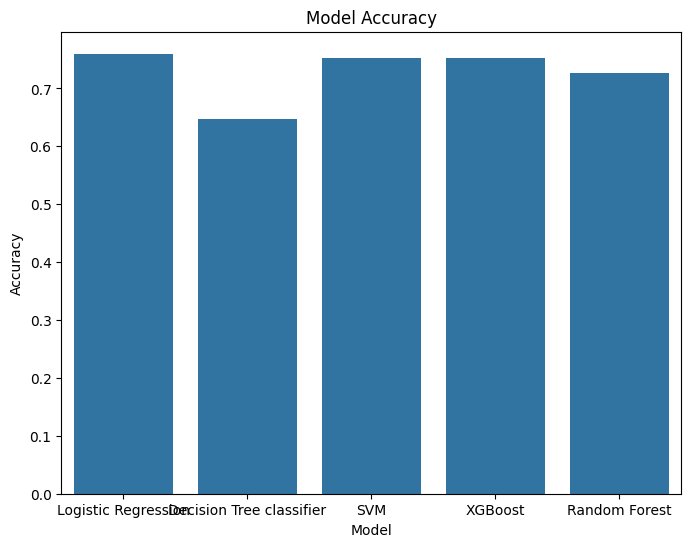

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='Accuracy', data=results)
plt.title('Model Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

# **Comparing Model Performance**

In [ ]:
results = pd.DataFrame({'Model': model_accuracies.keys(), 'Accuracy': model_accuracies.values()})
results

,Model,Accuracy
0,Logistic Regression,0.760000
1,Decision Tree classifier,0.646667
2,SVM,0.753333
3,XGBoost,0.753333
4,Random Forest,0.726667


In [ ]:
report = classification_report(y_test, logistic_y_pred, target_names=['Absence', 'Presence'])
svm_report = classification_report(y_test, svm_y_pred, target_names=['Absence', 'Presence'])
xgb_report = classification_report(y_test, xgb_y_pred, target_names=['Absence', 'Presence'])
decision_tree_report = classification_report(y_test, decision_tree_y_pred, target_names=['Absence', 'Presence'])
print(report)
print("=======================================================")
print(svm_report)
print("=======================================================")
print(xgb_report)

              precision    recall  f1-score   support

     Absence       0.77      0.97      0.86       113
    Presence       0.57      0.11      0.18        37

    accuracy                           0.76       150
   macro avg       0.67      0.54      0.52       150
weighted avg       0.72      0.76      0.69       150

              precision    recall  f1-score   support

     Absence       0.77      0.96      0.85       113
    Presence       0.50      0.14      0.21        37

    accuracy                           0.75       150
   macro avg       0.64      0.55      0.53       150
weighted avg       0.70      0.75      0.70       150

              precision    recall  f1-score   support

     Absence       0.80      0.90      0.85       113
    Presence       0.50      0.30      0.37        37

    accuracy                           0.75       150
   macro avg       0.65      0.60      0.61       150
weighted avg       0.72      0.75      0.73       150

